# 4. Inferential Statistics
### In this notebook, some inferential statistics techniques are applied for the fraud detection data.

In [16]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import math
import scipy.stats as st

import matplotlib
#matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

### Importing Data

In [17]:
df = pd.read_csv('/Users/nasim/Data_Science/Springboard/FraudDetection/PS_20174392719_1491204439457_log.csv')
#df = df[:1000000]
df.describe()
# Drop duplicate rows:
df = df.drop_duplicates()

In [18]:
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', 'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldBalanceOrig    float64
newBalanceOrig    float64
nameDest          object
oldBalanceDest    float64
newBalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 582.5+ MB


In [20]:
Y = df['isFraud']

In [21]:
X = df.loc[(df['type']=='TRANSFER') | (df['type']=='CASH_OUT')]
X = X.drop(['isFlaggedFraud','nameOrig', 'nameDest'], axis = 1)
X_Fraud = X.loc[Y==1]
X_Leg = X.loc[Y==0]
X.head(10)

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud
2,1,TRANSFER,181.00,181.00,0.0,0.0,0.00,1
3,1,CASH_OUT,181.00,181.00,0.0,21182.0,0.00,1
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.0,51513.44,0
19,1,TRANSFER,215310.30,705.00,0.0,22425.0,0.00,0
24,1,TRANSFER,311685.89,10835.00,0.0,6267.0,2719172.89,0
42,1,CASH_OUT,110414.71,26845.41,0.0,288800.0,2415.16,0
47,1,CASH_OUT,56953.90,1942.02,0.0,70253.0,64106.18,0
48,1,CASH_OUT,5346.89,0.00,0.0,652637.0,6453430.91,0
51,1,CASH_OUT,23261.30,20411.53,0.0,25742.0,0.00,0
58,1,TRANSFER,62610.80,79114.00,16503.2,517.0,8383.29,0


### Check if fraudulent and legitimate transactions are statistically different in amount of transaction

### What are the null and alternate hypotheses?
#### Null hypothesis is that there is no difference in amount of transaction between fraudulent and legitimate transactions . Alternative hypothesis is that the amount is statistically different in fraudulent and legitimate transactions. 

In [22]:
# Get the mean of amount for fraudulent and legitimate for test statistics:
mean_Leg = X_Leg['amount'].mean()
mean_Fraud = X_Fraud['amount'].mean()
print("Mean of amount for legitimate", mean_Leg)
print("Mean of amount for fraudulent", mean_Fraud)

# Get the mean differece:
mean_diff = mean_Fraud - mean_Leg


Mean of amount for legitimate 314115.4961703584
Mean of amount for fraudulent 1467967.299140387


In [23]:
# Get the standard deviation of each group:
std_Leg = X_Leg['amount'].std()
std_Fraud = X_Fraud['amount'].std()
print("Standard deviation of amount for legitimate", std_Leg)
print("Standard deviation of amount for fraudulent", std_Fraud)

Standard deviation of amount for legitimate 877144.1496342077
Standard deviation of amount for fraudulent 2404252.9472401612


In [24]:
# Get the size of each group:
size_Leg = X_Leg['amount'].size
size_Fraud = X_Fraud['amount'].size
print("Size of legitimate", size_Leg)
print("Size of fraudulent", size_Fraud)

Size of legitimate 2762196
Size of fraudulent 8213


In [25]:
# Calculate standard error:
SE = math.sqrt(std_Leg**2/size_Leg+std_Fraud**2/size_Fraud)
print("standard error = ", SE)

standard error =  26534.76014599928


In [26]:
# Calculate z-score:
z_score = mean_diff/SE
print("z-score = ", z_score)

z-score =  43.48453864370045


In [27]:
# Calculate p-value:
p_value = st.norm.sf(abs(z_score))*2
print("p-value = ", p_value)

p-value =  0.0


#### Since p-value is zero, we reject the null hypothesis. So there is a statistically significant difference between mean of amount for legitimate and fraudulent transactions.

In [28]:
# Creating some new features:
X_Fraud['errorBalanceOrig']= X_Fraud['newBalanceOrig']+X_Fraud['amount']-X_Fraud['oldBalanceOrig']
X_Leg['errorBalanceOrig']= X_Leg['newBalanceOrig']+X_Leg['amount']-X_Leg['oldBalanceOrig']
X_Fraud['errorBalanceDest']= X_Fraud['newBalanceDest']+X_Fraud['amount']-X_Fraud['oldBalanceDest']
X_Leg['errorBalanceDest']= X_Leg['newBalanceDest']+X_Leg['amount']-X_Leg['oldBalanceDest']
X['errorBalanceOrig']= X['newBalanceOrig']+X['amount']-X['oldBalanceOrig']
X['errorBalanceDest']= X['newBalanceDest']+X['amount']-X['oldBalanceDest']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

### Finding correlations between amount and errorBalanceDest:

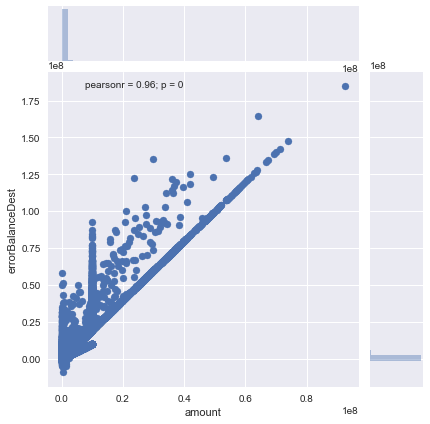

In [29]:
ax=sns.jointplot(x="amount", y="errorBalanceDest", data=X)
plt.show()

### Creating heat maps for correlations:

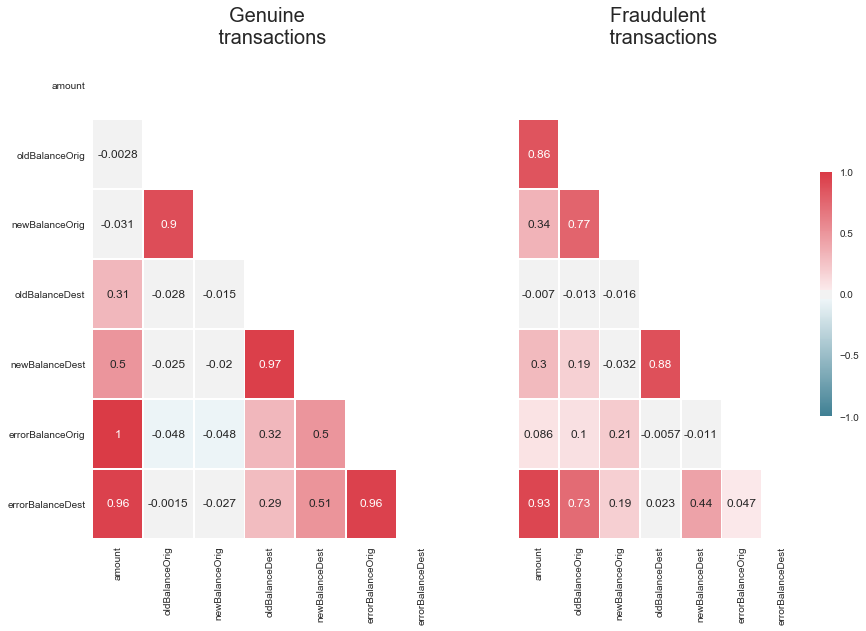

In [30]:
# Correlations for legitimate case:
correlationX_Leg = X_Leg.loc[:, ((X.columns != 'step') & (X.columns != 'isFraud'))].corr()

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlationX_Leg)
indices = np.triu_indices_from(correlationX_Leg)
mask[indices] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 9))
ax1 =sns.heatmap(correlationX_Leg, ax = ax1, vmin = -1, vmax = 1, square = False, linewidths = 0.5, cmap=cmap, mask = mask, cbar = False, annot=True)
ax1.set_title('Genuine \n transactions', size = 20)

# Correlations for fraudulent case:
correlationX_Fraud = X_Fraud.loc[:, ((X.columns != 'step') & (X.columns != 'isFraud'))].corr()
ax2 = sns.heatmap(correlationX_Fraud, vmin = -1, vmax = 1, cmap = cmap, ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, cbar_kws={"shrink": .5, 'ticks': [-1, -0.5, 0, 0.5, 1]}, annot=True)
ax2.set_title('Fraudulent \n transactions', size = 20);